In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Adaptación para que los datos obtenidos sean mas faciles de manejar**

In [45]:
df = pd.read_csv('Encuesta sobre el Poder Adquisitivo de Jóvenes Venezolanos (Respuestas).csv', index_col="Dirección de correo electrónico")
df.index.name = 'email'
df.drop('Marca temporal', axis=1, inplace=True)
df.rename(columns={'¿Cuál es tu edad?\nSi su edad se sale del rango establecido por favor absténgase de responder la encuesta ':'edad',
                   '¿En qué estado de Venezuela resides?': 'estado',
                    '¿Cuál es su nivel de formación actual? ' : 'formacion',
                    '¿Cuál es su ocupación principal?': 'ocupacion',
                    '¿Tu universidad es una institución educativa pública o privada?  ': 'universidad',
                    '  ¿En tu universidad, el año académico se organiza en semestres, trimestres o períodos anuales?  ' : 'periodo_clase',
                    '¿En cuál de las siguientes categorías se encuentra tu empleo actual?' : 'tipo_trabajo',
                    '  ¿En qué moneda recibes principalmente tu salario?  ' : 'moneda',
                    '¿Cuál es tu ingreso mensual promedio? ' : 'salario',
                    'Rellena los ítems que correspondan a las necesidades básicas que cubres con tus ingresos propios': 'gastos',
                    'Basado en la respuesta anterior ¿Cuál es el rango de tu gasto mensual en VIVIENDA?\nSi no cubres esta necesidad con tus ingresos, seleccionar 0.' : 'rango_vivienda',
                    '¿Cuál es el rango de tu gasto mensual en ALIMENTACIÓN?\nSi no cubres esta necesidad con tus ingresos, seleccionar 0.' : 'rango_alimentacion',
                    '¿Cuál es el rango de tu gasto mensual en TRANSPORTE?\nSi no cubres esta necesidad con tus ingresos, seleccionar 0.' : 'rango_transporte',
                    '¿Costeas actividades extracurriculares?\nSi es así, por favor indicar cuales.' : 'act_extracurricular',
                    'Basado en la respuesta anterior ¿Cuál es tu inversión mensual en estas actividades?' : 'rango_extracurricular',
                    '¿Sueles guardar de tus ingresos una reserva de dinero mensual?' : 'bool_ahorro',
                    'Si guardas una reserva mensual ¿Cuál es el rango de esta reserva?' : 'rango_ahorro',
                    '¿Consideras tener algún tipo de educación financiera? ' : 'educacion_financiera',
                    '¿Te gustaría aprender más sobre gestión de ingresos y educación financiera? ' : 'bool_educacion_financiera',
                    ' ¿Cómo calificarías tu nivel de vida actual en comparación con hace un año?' : 'nivel_vida',
                    '¿Qué tan satisfecho estás con tus ingresos actuales para cubrir tus necesidades? ' : 'nivel_complacidad'}
                   , inplace=True)

df.drop(index=['parragajenny1@gmail.com','xsdfsd@gmail.com'], inplace = True)
df.to_csv('EncuestaPA_JV.csv')
df

,¿Cuál es tu edad?\r\nSi su edad se sale del rango establecido por favor absténgase de responder la encuesta,estado,formacion,ocupacion,universidad,periodo_clase,tipo_trabajo,moneda,salario,gastos,...,"¿Cuál es el rango de tu gasto mensual en ALIMENTACIÓN?\r\nSi no cubres esta necesidad con tus ingresos, seleccionar 0.","¿Cuál es el rango de tu gasto mensual en TRANSPORTE?\r\nSi no cubres esta necesidad con tus ingresos, seleccionar 0.","¿Costeas actividades extracurriculares?\r\nSi es así, por favor indicar cuales.",rango_extracurricular,bool_ahorro,rango_ahorro,educacion_financiera,bool_educacion_financiera,nivel_vida,nivel_complacidad
email,,,,,,,,,,,,,,,,,,,,,
manuelmaldonado408@gmail.com,18 a 20 años.,Mérida,Bachiller,Estudiante y empleado.,Pública.,Semestre.,"Sector público (gobierno, instituciones públic...",Bolívares,$240 a $280,"Alimentación, Transporte",...,$60 a $80,$40 a $60,no tengo actividades extracurriculares,$0,Sí,Más de $80,No,Sí,Mejor.,Neutral.
camachofloriana28@gmail.com,18 a 20 años.,Mérida,Bachiller,Empleado o emprendedor,No aplica,No aplica,"Trabajador independiente (freelance, emprended...",Dólares estadounidenses,$160 a $200.,"Alimentación, Transporte",...,$20 a $40,$20 a $40,No aplica.,$0,Sí,Más de $80,Sí,Sí,Mucho mejor.,Bastante satisfecho.
luiscogollom.2004@gmail.com,21 a 23 años.,Mérida,Bachiller,Estudiante y empleado.,Pública.,Semestre.,"Sector privado (empresas, organizaciones no gu...",Bolívares,$80 a $120.,"Vivienda., Alimentación",...,$20 a $40,$0,No aplica.,$0,No,$0,Sí,Sí,Peor.,Nada satisfecho.
cabrileskevin9@gmail.com,18 a 20 años.,Miranda,Bachiller,Estudiante.,Pública.,Semestre.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mucho mejor.,Neutral.
genesisyeimardelgado@gmail.com,18 a 20 años.,Distrito Capital,Bachiller,Estudiante.,Pública.,Periodos anuales.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Igual.,Neutral.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
marquez.sosa.mariangel@gmail.com,18 a 20 años.,Mérida,Universitario.,Estudiante y empleado | Estudiante y emprendedor,Pública.,Semestre.,"Trabajador independiente (freelance, emprended...",Dólares estadounidenses,$160 a $200.,"Alimentación, Transporte",...,Más de $100,$20 a $40,Gimnasio,$10 a $30,Sí,$20 a $50,Sí,Sí,Mejor.,Neutral.
katiuskamrc@gmail.com,21 a 23 años.,Barinas,Universitario.,Estudiante.,Pública.,Semestre.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Igual.,Neutral.
ironmarquez403@gmail.com,21 a 23 años.,Barinas,Universitario.,Empleado o emprendedor,Pública.,Semestre.,"Trabajador independiente (freelance, emprended...",Combinación de bolívares y dólares,$240 a $280,"Vivienda., Alimentación, Transporte",...,$60 a $80,$40 a $60,No aplica.,$0,Sí,$50 a $80,Sí,Sí,Peor.,Neutral.


**Estados de Venezuela Encuestados**

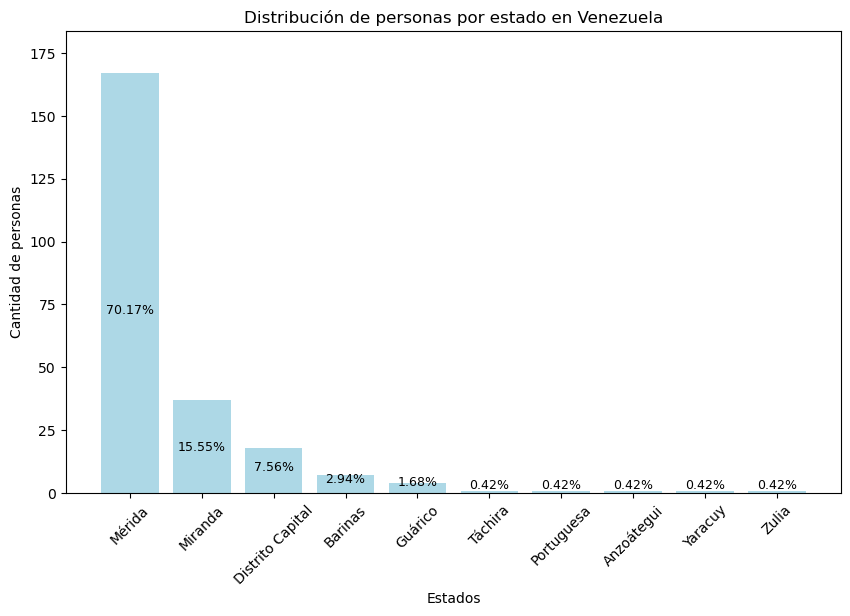

In [46]:
nueva_columna = df['estado']
estados_venezuela = pd.DataFrame(nueva_columna)
def comparar_personas_venezuela(df, columna_estado):
    # Filtramos el DataFrame para eliminar filas con valores faltantes 
    df_filtrado = df.dropna(subset=[columna_estado])

    # Obtenemos los estados únicos y contamos cuántas veces aparece cada uno
    estados_unicos = df_filtrado[columna_estado].unique()
    conteo_estados = df_filtrado[columna_estado].value_counts()

    # Creamos un DataFrame para el gráfico
    data = {'Estado': estados_unicos, 'Cantidad': conteo_estados}
    df_grafico = pd.DataFrame(data).reset_index(drop=True)

    # Calculamos el total de personas y el porcentaje para cada estado
    total_personas = conteo_estados.sum()
    df_grafico['Porcentaje'] = (df_grafico['Cantidad'] / total_personas) * 100

    # Creamos la figura y el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(df_grafico['Estado'], df_grafico['Cantidad'], width=0.8, color="lightblue")
    plt.title('Distribución de personas por estado en Venezuela')
    plt.xlabel('Estados')
    plt.ylabel('Cantidad de personas')
    plt.xticks(rotation=45)
    plt.ylim(0, df_grafico['Cantidad'].max() * 1.1)

    # Agregamos etiquetas de datos con los porcentajes
    for i in range(len(df_grafico)):
        plt.text(df_grafico['Estado'].iloc[i], df_grafico['Porcentaje'].iloc[i], f"{df_grafico['Porcentaje'].iloc[i]:.2f}%", ha='center', va='bottom', fontsize=9)

    
    plt.show()

comparar_personas_venezuela(estados_venezuela.copy(), 'estado')

**Se separan las personas empleadas con aquellas sin empleo**

In [47]:
def dividir_datos_segun_empleo(df):

    con_empleo = df.dropna(subset=['tipo_trabajo'])
    sin_empleo = df[df['tipo_trabajo'].isna()]

    return con_empleo, sin_empleo


df_con_empleo, df_sin_empleo = dividir_datos_segun_empleo(df)

# Empleados
df_con_empleo

,¿Cuál es tu edad?\r\nSi su edad se sale del rango establecido por favor absténgase de responder la encuesta,estado,formacion,ocupacion,universidad,periodo_clase,tipo_trabajo,moneda,salario,gastos,...,"¿Cuál es el rango de tu gasto mensual en ALIMENTACIÓN?\r\nSi no cubres esta necesidad con tus ingresos, seleccionar 0.","¿Cuál es el rango de tu gasto mensual en TRANSPORTE?\r\nSi no cubres esta necesidad con tus ingresos, seleccionar 0.","¿Costeas actividades extracurriculares?\r\nSi es así, por favor indicar cuales.",rango_extracurricular,bool_ahorro,rango_ahorro,educacion_financiera,bool_educacion_financiera,nivel_vida,nivel_complacidad
email,,,,,,,,,,,,,,,,,,,,,
manuelmaldonado408@gmail.com,18 a 20 años.,Mérida,Bachiller,Estudiante y empleado.,Pública.,Semestre.,"Sector público (gobierno, instituciones públic...",Bolívares,$240 a $280,"Alimentación, Transporte",...,$60 a $80,$40 a $60,no tengo actividades extracurriculares,$0,Sí,Más de $80,No,Sí,Mejor.,Neutral.
camachofloriana28@gmail.com,18 a 20 años.,Mérida,Bachiller,Empleado o emprendedor,No aplica,No aplica,"Trabajador independiente (freelance, emprended...",Dólares estadounidenses,$160 a $200.,"Alimentación, Transporte",...,$20 a $40,$20 a $40,No aplica.,$0,Sí,Más de $80,Sí,Sí,Mucho mejor.,Bastante satisfecho.
luiscogollom.2004@gmail.com,21 a 23 años.,Mérida,Bachiller,Estudiante y empleado.,Pública.,Semestre.,"Sector privado (empresas, organizaciones no gu...",Bolívares,$80 a $120.,"Vivienda., Alimentación",...,$20 a $40,$0,No aplica.,$0,No,$0,Sí,Sí,Peor.,Nada satisfecho.
noriigonza8@gmail.com,18 a 20 años.,Distrito Capital,Bachiller,Estudiante y empleado.,Pública.,Semestre.,"Sector privado (empresas, organizaciones no gu...",Combinación de bolívares y dólares,$240 a $280,"Alimentación, Transporte",...,$80 a $100,$40 a $60,Idiomas,$0,Sí,Más de $80,Sí,Sí,Mucho mejor.,Neutral.
Conesivanna@gmail.com,18 a 20 años.,Distrito Capital,Bachiller,Empleado o emprendedor,No aplica,No aplica,"Trabajador independiente (freelance, emprended...",Dólares estadounidenses,$80 a $120.,"Vivienda., Alimentación, Transporte",...,$80 a $100,$40 a $60,Idiomas,$50 a $70,No,$0,Sí,Sí,Igual.,Nada satisfecho.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gameplayscons@gmail.com,18 a 20 años.,Mérida,Universitario.,Estudiante y empleado | Estudiante y emprendedor,Pública.,Semestre.,"Sector público (gobierno, instituciones públic...",Bolívares,$80 a $120.,Vivienda.,...,$20 a $40,$20 a $40,"Gimnasio, Deporte, Música, Canto",$10 a $30,Sí,$20 a $50,Sí,Sí,Mejor.,Poco satisfecho.
boltronfizz@gmail.com,21 a 23 años.,Mérida,Universitario.,Estudiante y empleado | Estudiante y emprendedor,Pública.,Semestre.,"Sector privado (empresas, organizaciones no gu...",Bolívares,$120 a $160.,"Alimentación, Transporte",...,$20 a $40,$20 a $40,Deporte,$10 a $30,Sí,$0 a $10,Sí,Sí,Mejor.,Neutral.
evkevinmarquez@gmail.com,21 a 23 años.,Mérida,Universitario.,Estudiante y empleado | Estudiante y emprendedor,Pública.,Semestre.,"Trabajador independiente (freelance, emprended...",Dólares estadounidenses,$80 a $120.,"Alimentación, Transporte",...,$60 a $80,$20 a $40,No aplica.,Más de $70,Sí,Más de $80,No,Sí,Mejor.,Neutral.


In [48]:
# Desempleados
df_sin_empleo = df_sin_empleo.loc[:, "edad":"periodo_clase"].join(df.loc[:, "nivel_vida":])
df_sin_empleo

KeyError: 'edad'

**Modificacion a las columnas para que aquellas que diga "Si" y "No" se reemplazen con 1 y 0**

In [ ]:
def reemplazar_valores_multiple_columnas(df, columnas, reemplazo_si, reemplazo_no): 
    for col in columnas:
        if col not in df.columns:
            continue
        # Usa .loc para modificar la columna en el DataFrame original
        df.loc[:, col] = df[col].replace({'Sí': reemplazo_si, 'No': reemplazo_no})
    
    # Filtra valores nulos
    df = df.dropna(subset=columnas)



columnas_a_modificar = ['bool_ahorro', 'educacion_financiera', 'bool_educacion_financiera']

reemplazar_valores_multiple_columnas(df_con_empleo, columnas_a_modificar, 1, 0)

df_con_empleo.head(len(df))

df_con_empleo.head()

C:\Users\Julito\AppData\Local\Temp\ipykernel_23508\3417272489.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, col] = df[col].replace({'Sí': reemplazo_si, 'No': reemplazo_no})


,edad,estado,formacion,ocupacion,universidad,periodo_clase,tipo_trabajo,moneda,salario,gastos,...,rango_alimentacion,rango_transporte,act_extracurricular,rango_extracurricular,bool_ahorro,rango_ahorro,educacion_financiera,bool_educacion_financiera,nivel_vida,nivel_complacidad
email,,,,,,,,,,,,,,,,,,,,,
manuelmaldonado408@gmail.com,18 a 20 años.,Mérida,Bachiller,Estudiante y empleado.,Pública.,Semestre.,"Sector público (gobierno, instituciones públic...",Bolívares,$240 a $280,"Alimentación, Transporte",...,$60 a $80,$40 a $60,no tengo actividades extracurriculares,$0,1,Más de $80,0,1,Mejor.,Neutral.
camachofloriana28@gmail.com,18 a 20 años.,Mérida,Bachiller,Empleado o emprendedor,No aplica,No aplica,"Trabajador independiente (freelance, emprended...",Dólares estadounidenses,$160 a $200.,"Alimentación, Transporte",...,$20 a $40,$20 a $40,No aplica.,$0,1,Más de $80,1,1,Mucho mejor.,Bastante satisfecho.
luiscogollom.2004@gmail.com,21 a 23 años.,Mérida,Bachiller,Estudiante y empleado.,Pública.,Semestre.,"Sector privado (empresas, organizaciones no gu...",Bolívares,$80 a $120.,"Vivienda., Alimentación",...,$20 a $40,$0,No aplica.,$0,0,$0,1,1,Peor.,Nada satisfecho.
noriigonza8@gmail.com,18 a 20 años.,Distrito Capital,Bachiller,Estudiante y empleado.,Pública.,Semestre.,"Sector privado (empresas, organizaciones no gu...",Combinación de bolívares y dólares,$240 a $280,"Alimentación, Transporte",...,$80 a $100,$40 a $60,Idiomas,$0,1,Más de $80,1,1,Mucho mejor.,Neutral.
Conesivanna@gmail.com,18 a 20 años.,Distrito Capital,Bachiller,Empleado o emprendedor,No aplica,No aplica,"Trabajador independiente (freelance, emprended...",Dólares estadounidenses,$80 a $120.,"Vivienda., Alimentación, Transporte",...,$80 a $100,$40 a $60,Idiomas,$50 a $70,0,$0,1,1,Igual.,Nada satisfecho.


**Filtrar entre aquellos que posean gastos en actividades estracurriculares.**

In [ ]:
def filtrar_dataframe(df, columna, valores_a_eliminar):
    mascara = ~df[columna].isin(valores_a_eliminar) & df[columna].notna()
    df_filtrado = df[mascara]
    return df_filtrado

valores_a_eliminar = ['No aplica.', 'no tengo actividades extracurriculares', '$0', 'No aplica., ', 'No aplica., Deporte', 'Deporte, Música']
columna_a_filtrar = ['rango_extracurricular', 'act_extracurricular']

for columna in columna_a_filtrar:
    df_con_empleo = filtrar_dataframe(df_con_empleo, columna, valores_a_eliminar)

df_extracurriculares = df_con_empleo[["act_extracurricular", "rango_extracurricular"]]
df_extracurriculares

,act_extracurricular,rango_extracurricular
email,,
Conesivanna@gmail.com,Idiomas,$50 a $70
yusneipena08@gmail.com,Deporte,$10 a $30
nandadevi97816@gmail.com,Gimnasio,$10 a $30
veragabo2014@gmail.com,Gimnasio,$10 a $30
saritavloger@gmail.com,"Gimnasio, Arte",$10 a $30
...,...,...
escoto8496@gmail.com,"Arte, CINE",$10 a $30
valeria.piva.ornela@gmail.com,Gimnasio,$10 a $30
gameplayscons@gmail.com,"Gimnasio, Deporte, Música, Canto",$10 a $30


**Eliminar aquellos registros cuyos gastos por vivienda sea 0.**


In [ ]:
def filtrar_gasto_vivienda(df, columna_gasto_vivienda, valores_sin_gasto=["0", "$0", "$0."]):
    """
    Filtra el DataFrame para incluir solo quienes tienen gastos en vivienda,
    excluyendo valores que indiquen falta de gasto.

    Args:
        df (DataFrame): El DataFrame original.
        columna_gasto_vivienda (str): La columna que contiene el gasto en vivienda.
        valores_sin_gasto (list): Lista de valores que indican "sin gasto".

    Returns:
        DataFrame: Un DataFrame con solo quienes tienen gastos en vivienda.
    """
    # Filtramos filas donde el gasto en vivienda no está en los valores sin gasto
    df_con_gasto_vivienda = df[~df[columna_gasto_vivienda].isin(valores_sin_gasto)]
    return df_con_gasto_vivienda[["rango_vivienda", "salario","rango_ahorro"]]

# Filtramos el DataFrame original para incluir solo aquellos que reportan un gasto en vivienda
df_gasto_vivienda = filtrar_gasto_vivienda(df_con_empleo,"rango_vivienda")

df_gasto_vivienda

,rango_vivienda,salario,rango_ahorro
email,,,
Conesivanna@gmail.com,$80 a $120,$80 a $120.,$0
nandadevi97816@gmail.com,$120 a $160,$160 a $200.,$10 a $20
saritavloger@gmail.com,$80 a $120,$280 a $320,$0
yeynzth@gmail.com,$120 a $160,$120 a $160.,$10 a $20
morenomaria1107@gmail.com,$80 a $120,$280 a $320,$50 a $80
mcgfoxoficial@gmail.com,$40 a 80$,$120 a $160.,$0
andrealobopena@gmail.com,$40 a 80$,$160 a $200.,$10 a $20
rjagmar@gmail.com,$80 a $120,$280 a $320,$20 a $50
geql14200@gmail.com,$80 a $120,$120 a $160.,$0 a $10


**Filtrar entre aquellos que poseen gastos por transporte (Porcentaje)**

In [ ]:
limpieza = df_con_empleo[(df_con_empleo["rango_transporte"].notnull()) & (df_con_empleo["rango_transporte"] != "$0")]
df_rango_transporte = limpieza[["rango_transporte", "salario", "rango_ahorro"]]
moda_transporte = df_rango_transporte["rango_transporte"].mode()
conteo_transporte = df_rango_transporte["rango_transporte"].value_counts()
conteo_porcentual_transporte = (conteo_transporte/conteo_transporte.sum())*100

df_rango_transporte

,rango_transporte,salario,rango_ahorro
email,,,
Conesivanna@gmail.com,$40 a $60,$80 a $120.,$0
nandadevi97816@gmail.com,$20 a $40,$160 a $200.,$10 a $20
veragabo2014@gmail.com,$20 a $40,$240 a $280,$20 a $50
saritavloger@gmail.com,$20 a $40,$280 a $320,$0
yeynzth@gmail.com,$20 a $40,$120 a $160.,$10 a $20
yakenazaret@gmail.com,$20 a $40,Más de $320,Más de $80
morenomaria1107@gmail.com,$60 a $80,$280 a $320,$50 a $80
mcgfoxoficial@gmail.com,$20 a $40,$120 a $160.,$0
rjagmar@gmail.com,$40 a $60,$280 a $320,$20 a $50


**Filtrado por aquellos que posee gastos en alimentación.**

In [ ]:
def filtrar_gasto_alimentacion(df, columna_gasto_alimentacion, valores_sin_gasto=["0", "$0", "$0."]):
    """
    Filtra el DataFrame para incluir solo quienes tienen gastos en alimentación,
    excluyendo valores que indiquen falta de gasto o NaN.

    Args:
        df (DataFrame): El DataFrame original.
        columna_gasto_alimentacion (str): La columna que contiene el gasto en alimentación.
        valores_sin_gasto (list): Lista de valores que indican "sin gasto".

    Returns:
        DataFrame: Un DataFrame con solo quienes tienen gastos en alimentación.
    """
    # Excluir filas donde el gasto en alimentación es NaN o está en los valores sin gasto
    df_con_gasto_alimentacion = df[~df[columna_gasto_alimentacion].isin(valores_sin_gasto) & df[columna_gasto_alimentacion].notna()]
    return df_con_gasto_alimentacion[["rango_alimentacion", "salario", "rango_ahorro"]]

# Filtramos el DataFrame original para incluir solo aquellos que reportan un gasto en alimentación
df_gasto_alimentacion = filtrar_gasto_alimentacion(df_con_empleo, "rango_alimentacion")
df_gasto_alimentacion
# df_gasto_alimentacion.head(len(df_gasto_alimentacion))


,rango_alimentacion,salario,rango_ahorro
email,,,
Conesivanna@gmail.com,$80 a $100,$80 a $120.,$0
yusneipena08@gmail.com,$20 a $40,$40 a $80.,$0 a $10
nandadevi97816@gmail.com,$60 a $80,$160 a $200.,$10 a $20
veragabo2014@gmail.com,$60 a $80,$240 a $280,$20 a $50
saritavloger@gmail.com,$60 a $80,$280 a $320,$0
yeynzth@gmail.com,$60 a $80,$120 a $160.,$10 a $20
morenomaria1107@gmail.com,$60 a $80,$280 a $320,$50 a $80
mcgfoxoficial@gmail.com,Más de $100,$120 a $160.,$0
andrealobopena@gmail.com,$40 a $60,$160 a $200.,$10 a $20


**Grafica de quienes trabajan en sector público, privado y de manera independiente.**

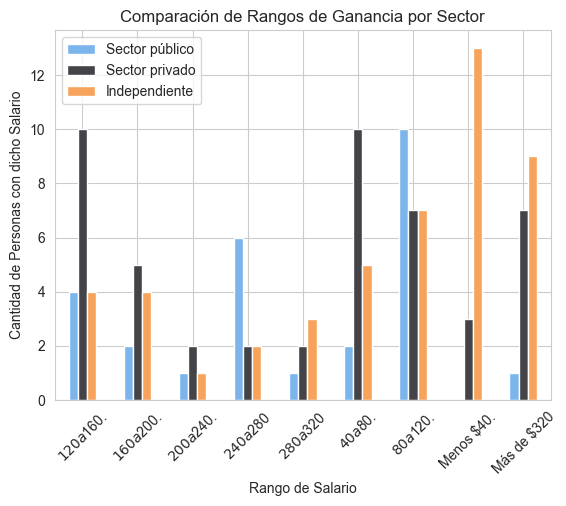

In [ ]:
limpieza = df[df["tipo_trabajo"].notnull()]

def separacion(limpieza):
    publico = limpieza[limpieza["tipo_trabajo"].str.contains("público")]
    privado = limpieza[limpieza["tipo_trabajo"].str.contains("privado")]
    independiente = limpieza[limpieza["tipo_trabajo"].str.contains("independiente")]

    publico.loc[:,"tipo_trabajo"] = "publico"
    privado.loc[:,"tipo_trabajo"] = "privado"
    independiente.loc[:,"tipo_trabajo"] = "independiente"

    return publico, privado, independiente

sector_publico, sector_privado, sector_independiente = separacion(limpieza)

moda_salario_publico = sector_publico["salario"].mode()
conteo_salario_publico = sector_publico["salario"].value_counts()
conteo_porcentual_salario_publico = (conteo_salario_publico/conteo_salario_publico.sum())*100

moda_salario_privado = sector_privado["salario"].mode()
conteo_salario_privado = sector_privado["salario"].value_counts()
conteo_porcentual_salario_privado = (conteo_salario_privado/conteo_salario_privado.sum())*100

moda_salario_independiente = sector_independiente["salario"].mode()
conteo_salario_independiente = sector_independiente["salario"].value_counts()
conteo_porcentual_salario_independiente = (conteo_salario_independiente/conteo_salario_independiente.sum())*100

comparacion = pd.DataFrame({
    "Sector público": conteo_salario_publico,
    "Sector privado": conteo_salario_privado,
    "Independiente": conteo_salario_independiente
})

comparacion.plot(kind="bar", color = ["#7cb5ec", "#434348", "#f7a35c"])
plt.title("Comparación de Rangos de Ganancia por Sector")
plt.xlabel("Rango de Salario")
plt.ylabel("Cantidad de Personas con dicho Salario")
plt.xticks(rotation=45)
plt.show()



¿Cuál es el ingreso promedio en cada tipo de ocupación o sector (público, privado, emprendimiento)? PRIVADO

In [ ]:
# Crear una copia del DataFrame para no modificar el original
df_copia = sector_privado[['ocupacion','tipo_trabajo','salario']]

# Función para calcular el promedio de un rango
def calcular_promedio_salario(rango):
    limites = rango.split(' a ')
    try:
        return (float(limites[0].replace('$', '')) + float(limites[1].replace('$', ''))) / 2
    except ValueError:
        # Si hay un error, asumimos que es "Más de $320" y retornamos 320
        return 320

# Aplicar la función a cada elemento de la columna 'salario' y crear una nueva columna
df_copia['salario_promedio'] = df_copia['salario'].apply(calcular_promedio_salario)

# Reemplazar la columna original con la nueva en la copia
df_copia['salario'] = df_copia['salario_promedio']

# Calcular el promedio general de la columna 'salario_promedio' en df_copia
promedio_general_privado = df_copia['salario_promedio'].mean()



C:\Users\user\AppData\Local\Temp\ipykernel_9392\2676951822.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copia['salario_promedio'] = df_copia['salario'].apply(calcular_promedio_salario)
C:\Users\user\AppData\Local\Temp\ipykernel_9392\2676951822.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copia['salario'] = df_copia['salario_promedio']


¿Cuál es el ingreso promedio en cada tipo de ocupación o sector (público, privado, emprendimiento)? PÚBLICO

In [ ]:
# Crear una copia del DataFrame para no modificar el original
df_copia2 = sector_publico[['ocupacion','tipo_trabajo','salario']]

# Función para calcular el promedio de un rango
def calcular_promedio_salario(rango):
    limites = rango.split(' a ')
    try:
        return (float(limites[0].replace('$', '')) + float(limites[1].replace('$', ''))) / 2
    except ValueError:
        # Si hay un error, asumimos que es "Más de $320" y retornamos 320
        return 320

# Aplicar la función a cada elemento de la columna 'salario' y crear una nueva columna
df_copia2['salario_promedio'] = df_copia2['salario'].apply(calcular_promedio_salario)

# Reemplazar la columna original con la nueva en la copia
df_copia2['salario'] = df_copia2['salario_promedio']

promedio_general_publico = df_copia2['salario_promedio'].mean()


C:\Users\user\AppData\Local\Temp\ipykernel_9392\1353970244.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copia2['salario_promedio'] = df_copia2['salario'].apply(calcular_promedio_salario)
C:\Users\user\AppData\Local\Temp\ipykernel_9392\1353970244.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copia2['salario'] = df_copia2['salario_promedio']


¿Cuál es el ingreso promedio en cada tipo de ocupación o sector (público, privado, emprendimiento)? INDEPENDIENTE

In [ ]:
# Crear una copia del DataFrame para no modificar el original
df_copia3 = sector_independiente[['ocupacion','tipo_trabajo','salario']]

# Función para calcular el promedio de un rango
def calcular_promedio_salario(rango):
    limites = rango.split('a')
    try:
        return (float(limites[0].replace('$', '')) + float(limites[1].replace('$', ''))) / 2
    except ValueError:
        # Si hay un error, asumimos que es "Más de $320" y retornamos 320
        return 320

# Aplicar la función a cada elemento de la columna 'salario' y crear una nueva columna
df_copia3['salario_promedio'] = df_copia3['salario'].apply(calcular_promedio_salario)

# Reemplazar la columna original con la nueva en la copia
df_copia3['salario'] = df_copia3['salario_promedio']

promedio_general_independiente = df_copia3['salario_promedio'].mean()
df_copia3.head(3)

C:\Users\user\AppData\Local\Temp\ipykernel_9392\3644215513.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copia3['salario_promedio'] = df_copia3['salario'].apply(calcular_promedio_salario)
C:\Users\user\AppData\Local\Temp\ipykernel_9392\3644215513.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copia3['salario'] = df_copia3['salario_promedio']


,ocupacion,tipo_trabajo,salario,salario_promedio
email,,,,
camachofloriana28@gmail.com,Empleado o emprendedor,independiente,180.0,180.0
Conesivanna@gmail.com,Empleado o emprendedor,independiente,100.0,100.0
mafercasmen@gmail.com,Estudiante y empleado.,independiente,320.0,320.0


¿Los emprendedores tienden a tener mayores reservas de ahorro que quienes trabajan en el sector público o privado?


In [ ]:
Ahorro_publico = sector_publico[['tipo_trabajo','rango_ahorro']]
Ahorro_privado = sector_privado[['tipo_trabajo','rango_ahorro']]
Ahorro_independiente = sector_independiente[['tipo_trabajo','rango_ahorro']]

Ahorros_por_sector = pd.concat([Ahorro_publico, Ahorro_privado, Ahorro_independiente], axis=0, ignore_index=True)





In [ ]:
def calcular_promedio_ahorro(rango):
    
    if pd.isna(rango) or not isinstance(rango, str):
        return np.nan  # Manejar valores nulos o no cadenas

    rango = rango.strip().lower()  # Eliminar espacios y convertir a minúsculas

    if rango == 'más de $80':
        return 80
    elif rango == '$0':
        return 0  # Reemplazar '$0' por 0

    limites = rango.split(' a ')
    if len(limites) != 2:
        return np.nan  # Manejar formatos incorrectos

    try:
        valor1 = float(limites[0].replace('$', ''))
        valor2 = float(limites[1].replace('$', ''))
        return (valor1 + valor2) / 2
    except ValueError:
        print(f"Error al procesar el rango: {rango}")
        return np.nan

Ahorro_publico.loc[:, 'ahorro_promedio'] = Ahorro_publico['rango_ahorro'].apply(calcular_promedio_ahorro)

promedio_ahorro_publico = Ahorro_publico['ahorro_promedio'].mean()
promedio_ahorro_publico=promedio_ahorro_publico.round(2)
promedio_ahorro_publico


C:\Users\user\AppData\Local\Temp\ipykernel_9392\886057655.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ahorro_publico.loc[:, 'ahorro_promedio'] = Ahorro_publico['rango_ahorro'].apply(calcular_promedio_ahorro)


np.float64(29.07)

In [ ]:
def calcular_promedio_ahorro(rango):
    
    if pd.isna(rango) or not isinstance(rango, str):
        return np.nan  # Manejar valores nulos o no cadenas

    rango = rango.strip().lower()  # Eliminar espacios y convertir a minúsculas

    if rango == 'más de $80':
        return 80
    elif rango == '$0':
        return 0  # Reemplazar '$0' por 0

    limites = rango.split(' a ')
    if len(limites) != 2:
        return np.nan  # Manejar formatos incorrectos

    try:
        valor1 = float(limites[0].replace('$', ''))
        valor2 = float(limites[1].replace('$', ''))
        return (valor1 + valor2) / 2
    except ValueError:
        print(f"Error al procesar el rango: {rango}")
        return np.nan

Ahorro_privado.loc[:, 'ahorro_promedio'] = Ahorro_privado['rango_ahorro'].apply(calcular_promedio_ahorro)


promedio_ahorro_privado = Ahorro_privado['ahorro_promedio'].mean()
promedio_ahorro_privado=promedio_ahorro_privado.round(2)
print(promedio_ahorro_privado)


26.88


In [ ]:
def calcular_promedio_ahorro(rango):
    
    if pd.isna(rango) or not isinstance(rango, str):
        return np.nan  # Manejar valores nulos o no cadenas

    rango = rango.strip().lower()  # Eliminar espacios y convertir a minúsculas

    if rango == 'más de $80':
        return 80
    elif rango == '$0':
        return 0  # Reemplazar '$0' por 0

    limites = rango.split(' a ')
    if len(limites) != 2:
        return np.nan  # Manejar formatos incorrectos

    try:
        valor1 = float(limites[0].replace('$', ''))
        valor2 = float(limites[1].replace('$', ''))
        return (valor1 + valor2) / 2
    except ValueError:
        print(f"Error al procesar el rango: {rango}")
        return np.nan

Ahorro_independiente.loc[:, 'ahorro_promedio'] = Ahorro_independiente['rango_ahorro'].apply(calcular_promedio_ahorro)

promedio_ahorro_independiente = Ahorro_independiente['ahorro_promedio'].mean()
promedio_ahorro_independiente=promedio_ahorro_independiente.round(2)
print(promedio_ahorro_independiente)



29.58


C:\Users\Julito\AppData\Local\Temp\ipykernel_23508\1282327532.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ahorro_independiente.loc[:, 'ahorro_promedio'] = Ahorro_independiente['rango_ahorro'].apply(calcular_promedio_ahorro)


¿Qué porcentaje de jóvenes gana más de $320 al mes, y cuáles son sus ocupaciones principales?

In [ ]:
ocupacion = pd.concat([df_copia, df_copia2, df_copia3], axis=0, ignore_index=True)
df_jovenes = ocupacion[['ocupacion','salario']]


# Asegurarse de que la columna 'salario' sea numérica
df_jovenes.loc[:, 'salario'] = pd.to_numeric(df_jovenes['salario'], errors='coerce')  # Convierte a numérico, reemplazando errores con NaN

# Intentar acceder al valor de nuevo
try:
    d = df_jovenes.iloc[119, 0]
    print(d)
except IndexError:
    print("El índice está fuera de rango.")

# Filtrar por salario
ocupacion_jovenes = df_jovenes[df_jovenes['salario'] > 300]
menos_300=df_jovenes[df_jovenes['salario'] < 300]
total=len(df_jovenes['salario'])
df_jovenes

Estudiante y empleado | Estudiante y emprendedor


,ocupacion,salario
0,Estudiante y empleado.,100.0
1,Estudiante y empleado.,260.0
2,Estudiante y empleado.,60.0
3,Estudiante y empleado.,320.0
4,Estudiante y empleado.,100.0
...,...,...
118,Empleado o emprendedor,140.0
119,Estudiante y empleado | Estudiante y emprendedor,320.0
120,Estudiante y empleado | Estudiante y emprendedor,100.0
121,Estudiante y empleado | Estudiante y emprendedor,180.0


GRÁFICO DE PROMEDIO DE AHORRO EN DIFERENTES SECTORES DE TRABAJO

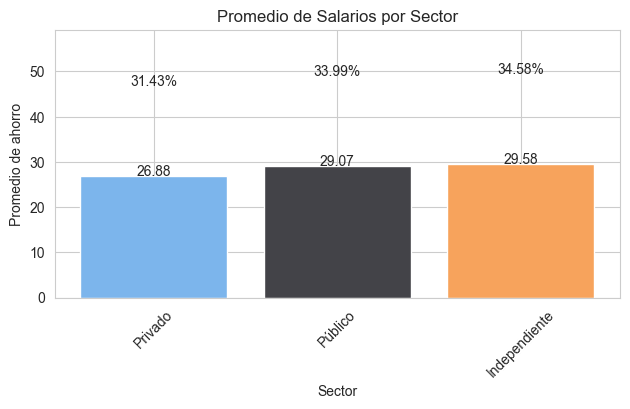

In [ ]:
promedio = {'Sector':['Privado','Público','Independiente'],
            'promedio_ahorro': [promedio_ahorro_privado.round(2), promedio_ahorro_publico.round(2), promedio_ahorro_independiente.round(2)]}

df_promedios = pd.DataFrame(promedio)


# Agregar etiquetas de datos (valores exactos)
for i in range(len(df_promedios)):
    plt.text(i, df_promedios['promedio_ahorro'][i], df_promedios['promedio_ahorro'][i], ha='center')

# Calcular los porcentajes del total
total = df_promedios['promedio_ahorro'].sum()
df_promedios['Porcentaje'] = (df_promedios['promedio_ahorro'] / total) * 100

# Agregar etiquetas de porcentaje con más espacio
for i in range(len(df_promedios)):
    plt.text(i, df_promedios['promedio_ahorro'][i] + 20, f"{df_promedios['Porcentaje'][i]:.2f}%", ha='center')

# Crear la gráfica
plt.bar(df_promedios['Sector'], df_promedios['promedio_ahorro'], color= ["#7cb5ec", "#434348", "#f7a35c"])
plt.title('Promedio de Salarios por Sector')
plt.xlabel('Sector')
plt.ylabel('Promedio de ahorro')
plt.ylim(0, df_promedios['promedio_ahorro'].max() * 2)
plt.xticks(rotation=45)
plt.tight_layout() 
plt.subplots_adjust(top=0.8)
plt.show()

 Gráfico deñ ingreso promedio en cada tipo de ocupación o sector (público, privado, emprendimiento)

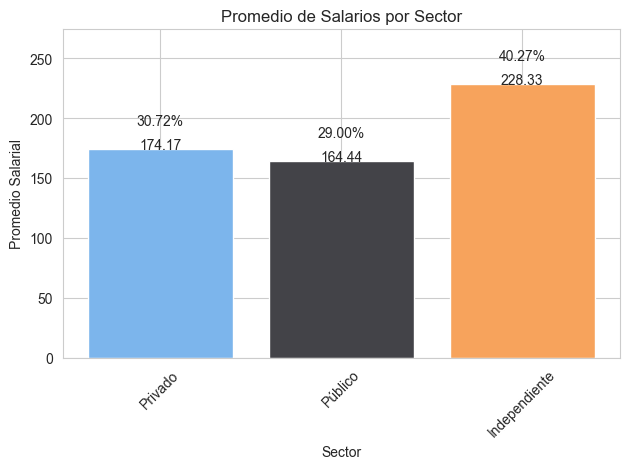

In [ ]:
promedio = {'Sector':['Privado','Público','Independiente'],
            'promedio_salarial': [promedio_general_privado.round(2), promedio_general_publico.round(2), promedio_general_independiente.round(2)]}

df_promedios = pd.DataFrame(promedio)


# Agregar etiquetas de datos (valores exactos)
for i in range(len(df_promedios)):
    plt.text(i, df_promedios['promedio_salarial'][i], df_promedios['promedio_salarial'][i], ha='center')

# Calcular los porcentajes del total
total = df_promedios['promedio_salarial'].sum()
df_promedios['Porcentaje'] = (df_promedios['promedio_salarial'] / total) * 100

# Agregar etiquetas de porcentaje con más espacio
for i in range(len(df_promedios)):
    plt.text(i, df_promedios['promedio_salarial'][i] + 20, f"{df_promedios['Porcentaje'][i]:.2f}%", ha='center')

# Crear la gráfica
plt.bar(df_promedios['Sector'], df_promedios['promedio_salarial'], color= ["#7cb5ec", "#434348", "#f7a35c"])
plt.title('Promedio de Salarios por Sector')
plt.xlabel('Sector')
plt.ylabel('Promedio Salarial')
plt.ylim(0, df_promedios['promedio_salarial'].max() * 1.2)
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

**Gráfico de porcentaje de personas por sector de trabajo**

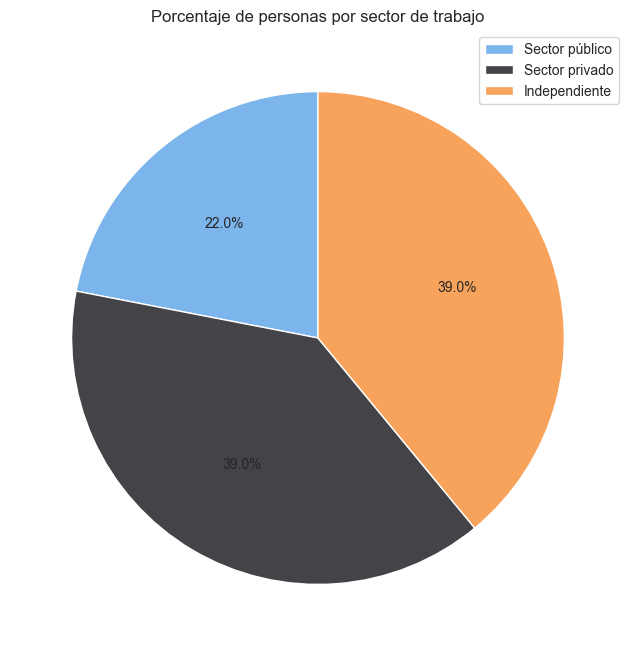

In [ ]:
tamaño_sector = {
    "Sector público": len(sector_publico),
    "Sector privado": len(sector_privado),
    "Independiente": len(sector_independiente)
}

#Gráfico de porcentaje de personas por sector de trabajo
plt.figure(figsize=(8, 8))
plt.pie(list(tamaño_sector.values()), colors = ["#7cb5ec", "#434348", "#f7a35c"], autopct='%1.1f%%', startangle =90)
plt.title("Porcentaje de personas por sector de trabajo")
plt.legend(tamaño_sector.keys())
plt.show()

**Gráfico del porcentaje de personas en cada rango salarial**

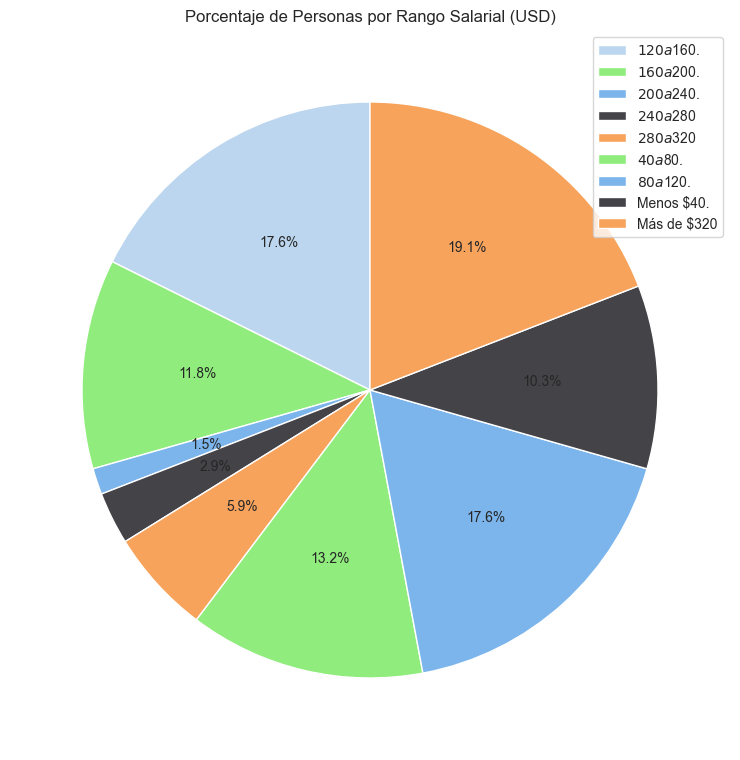

In [ ]:
conteo_salarios = df_con_empleo["salario"].value_counts().sort_index()
plt.figure(figsize=(9, 9))
plt.pie(conteo_salarios,colors=["#BBD6EE", "#90ed7d", "#7cb5ec", "#434348", "#f7a35c", "#90ed7d", "#7cb5ec", "#434348", "#f7a35c"], autopct="%1.1f%%", startangle=90)
plt.title("Porcentaje de Personas por Rango Salarial (USD)")
plt.legend(conteo_salarios.index)
plt.subplots_adjust(left=0.2, right=1, top=1, bottom=0.2)
plt.show()

**Gráfico de jóvenes que ganan más de $320 al mes y sus ocupaciones**

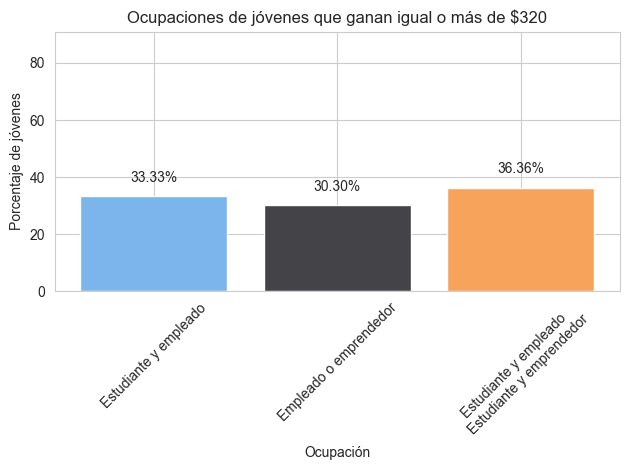

In [ ]:
#ESTUDIANTE Y EMPLEADO

mas_320 = df_jovenes[df_jovenes['salario'] == 320]

estudian_empleado=df_jovenes[df_jovenes['ocupacion']=='Estudiante y empleado.']
Caso_EsEm1= estudian_empleado[estudian_empleado['salario'] == 320]
Caso_EsEm1 = (Caso_EsEm1['salario'].count()/mas_320['salario'].count()) *100

#EMPLEADO O EMPRENDEDOR
Empleado_emprendedor=df_jovenes[df_jovenes['ocupacion']=='Empleado o emprendedor']
Caso_EsEmp1= Empleado_emprendedor[Empleado_emprendedor['salario']>300]
Caso_EsEmp1 = (Caso_EsEmp1['salario'].count()/mas_320['salario'].count()) *100

#Estudiante y empleado | Estudiante y emprendedor
Estudiante_empleado_emprendedor=df_jovenes[df_jovenes['ocupacion']=='Estudiante y empleado | Estudiante y emprendedor' ]
Caso_EsEmEmp1= Estudiante_empleado_emprendedor[Estudiante_empleado_emprendedor['salario']>300]
Caso_EsEmEmp1 = (Caso_EsEmEmp1['salario'].count()/mas_320['salario'].count()) *100

ocupacion = {'ocupacion':['Estudiante y empleado','Empleado o emprendedor','Estudiante y empleado \n Estudiante y emprendedor'], 
             'valores' : [
                 Caso_EsEm1.round(2), 
                 Caso_EsEmp1.round(2), 
                 Caso_EsEmEmp1.round(2)]}

df_ocupacion = pd.DataFrame(ocupacion)

# Calcular los porcentajes del total
total = df_ocupacion['valores'].sum()
df_ocupacion['Porcentaje'] = (df_ocupacion['valores'] / total) * 100

# Agregar etiquetas de porcentaje con más espacio
for i in range(len(df_ocupacion)):
    plt.text(i, df_ocupacion['valores'][i] + 5, f"{df_ocupacion['Porcentaje'][i]:.2f}%", ha='center')

# Crear la gráfica

plt.bar(df_ocupacion['ocupacion'], df_ocupacion['valores'], color= ["#7cb5ec", "#434348", "#f7a35c"])
plt.title('Ocupaciones de jóvenes que ganan igual o más de $320')
plt.xlabel('Ocupación')
plt.ylabel('Porcentaje de jóvenes')
plt.ylim(0, df_ocupacion['valores'].max() * 2.5)
plt.xticks(rotation=45)
plt.tight_layout() 

plt.show()

**Gráfico del porcentaje de personas que gana en cada moneda**

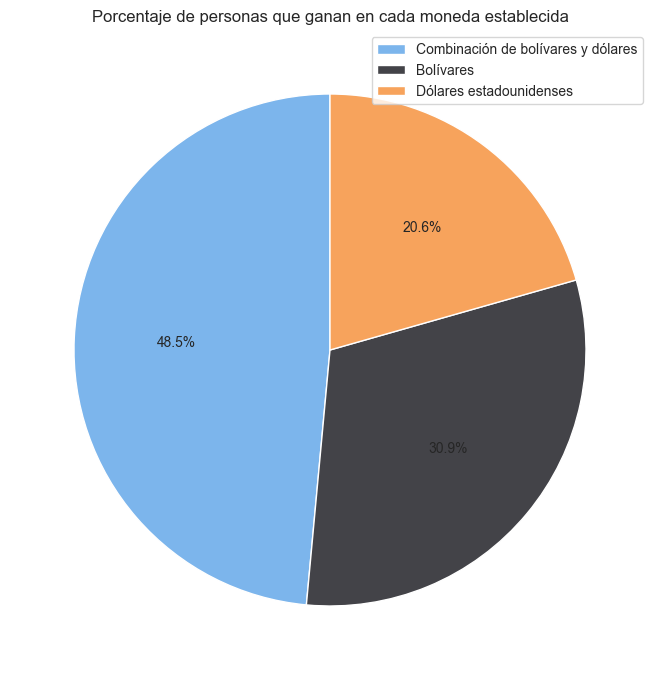

In [ ]:
conteo_moneda = df_con_empleo[(df_con_empleo["moneda"] != "Pesos y dolares") & (df_con_empleo["moneda"] != "Bolivares y pesos colombianos/dolares")]
conteo_moneda = conteo_moneda["moneda"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(conteo_moneda, colors=["#7cb5ec", "#434348", "#f7a35c"], autopct="%1.1f%%", startangle=90)
plt.title("Porcentaje de personas que ganan en cada moneda establecida")
plt.legend(conteo_moneda.index)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

**Porcentaje de jovenes que trabajan y ahorran vs que trabajan y no ahorran | cuanto es el promedio de ahorro mensual**

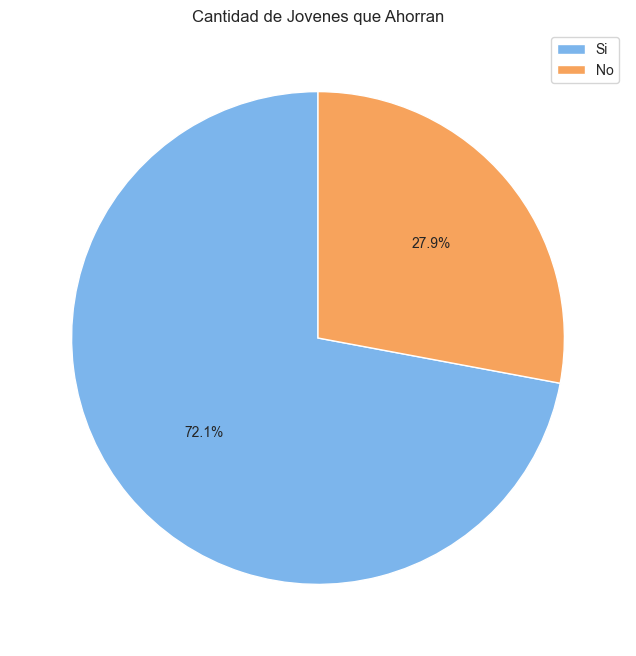

In [ ]:

conteo_ahorro = df_con_empleo["bool_ahorro"].value_counts()
plt.figure(figsize=(8, 8))
Ahorro={"Si":1,"No":0}
plt.pie(conteo_ahorro, colors=["#7cb5ec", "#f7a35c"], autopct="%1.1f%%", startangle=90)
plt.title("Cantidad de Jovenes que Ahorran")

plt.legend(Ahorro.keys())
plt.show()

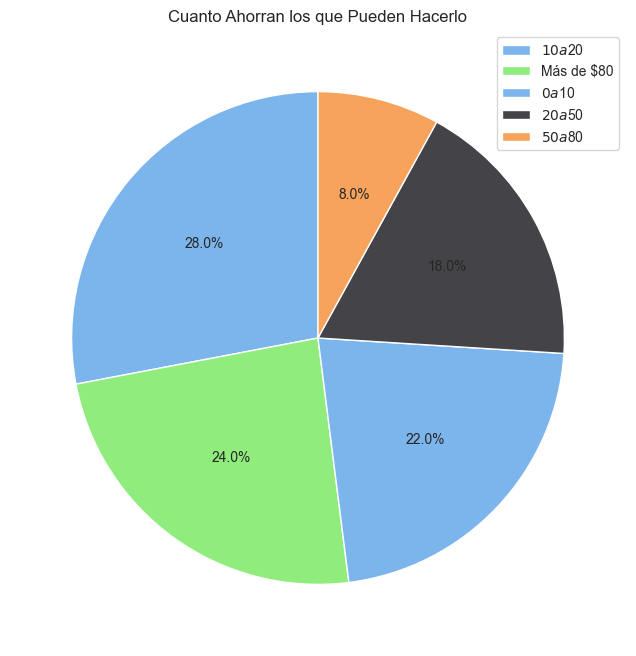

In [ ]:
rango_ahorro = df_con_empleo[df_con_empleo["rango_ahorro"] != "$0"]
plt.figure(figsize=(8, 8))
rango_ahorro = rango_ahorro["rango_ahorro"].value_counts()
plt.pie(rango_ahorro, colors=["#7cb5ec", "#90ed7d", "#7cb5ec", "#434348", "#f7a35c"], autopct="%1.1f%%", startangle=90)
plt.title("Cuanto Ahorran los que Pueden Hacerlo")

plt.legend(rango_ahorro.index)
plt.show()

**Cuantas Personas Gastan en Cada Necesidad**

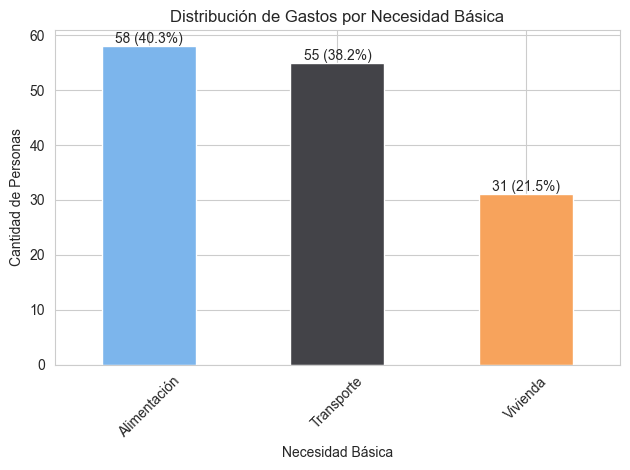

In [ ]:
comparacion_necesidades = pd.DataFrame({
    "Necesidad" : ["Alimentación", "Transporte", "Vivienda"],
    "Cantidad": [len(df_gasto_alimentacion["rango_alimentacion"]), len(df_rango_transporte["rango_transporte"]), len(df_gasto_vivienda["rango_vivienda"])]
})

# Calcular el total de personas y los porcentajes
total_personas = comparacion_necesidades['Cantidad'].sum()
comparacion_necesidades['Porcentaje'] = (comparacion_necesidades['Cantidad'] / total_personas) * 100

# Crear el gráfico de barras
grafica_necesidades = comparacion_necesidades.plot(kind="bar", x="Necesidad", y="Cantidad", color=["#7cb5ec", "#434348", "#f7a35c"], legend=False)

# Añadir etiquetas con cantidad y porcentaje
for i, p in enumerate(grafica_necesidades.patches):
    y_value = p.get_height()
    x_value = p.get_x() + p.get_width() / 2
    label = f"{int(y_value)} ({comparacion_necesidades['Porcentaje'][i]:.1f}%)"
    plt.annotate(label, (x_value, y_value), ha='center', va='bottom', fontsize=10)

# Personalizar el gráfico
plt.title("Distribución de Gastos por Necesidad Básica")
plt.xlabel("Necesidad Básica")
plt.ylabel("Cantidad de Personas")
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar el espacio entre elementos
plt.show()

**Cuanto Gastan en Cada Necesidad**

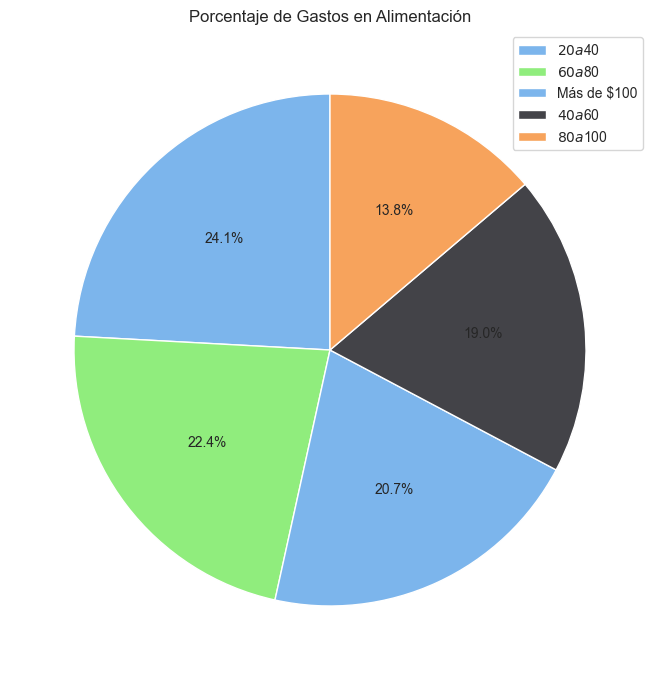

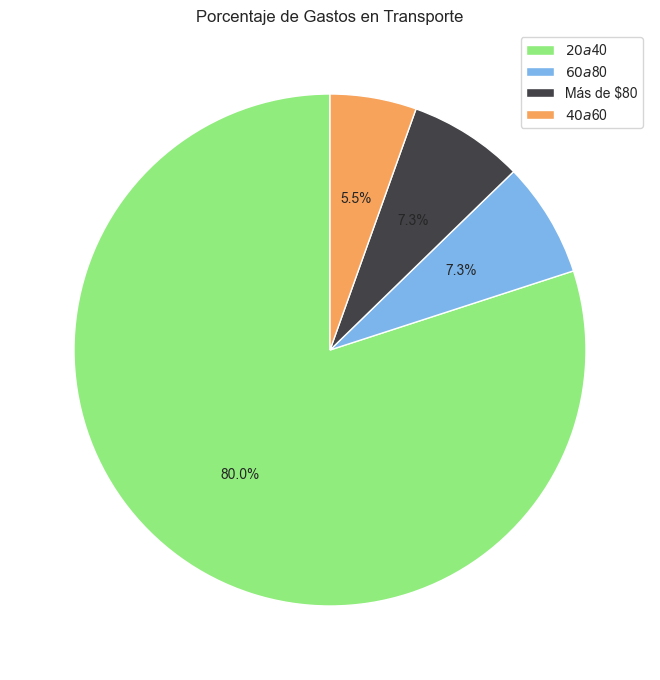

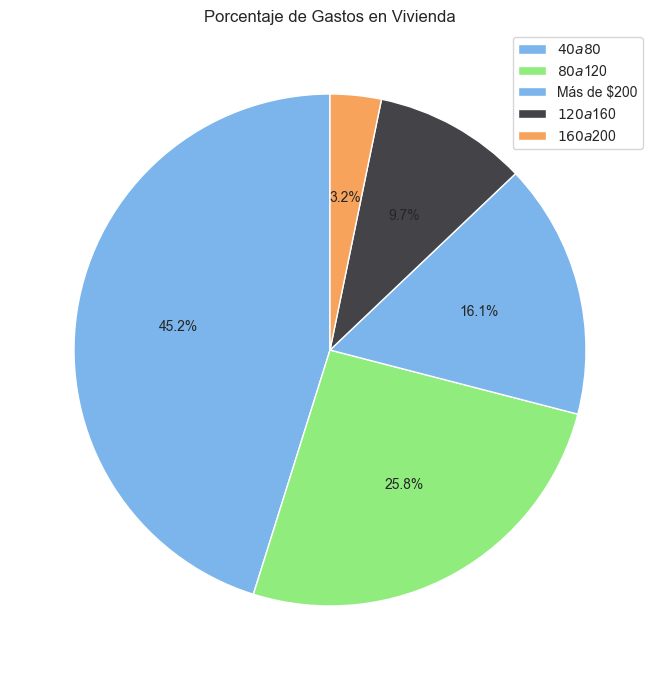

In [ ]:
gasto_alimentacion = df_gasto_alimentacion["rango_alimentacion"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gasto_alimentacion, colors=["#7cb5ec", "#90ed7d", "#7cb5ec", "#434348", "#f7a35c"], autopct="%1.1f%%", startangle=90)
plt.title("Porcentaje de Gastos en Alimentación")
plt.legend(labels=list(gasto_alimentacion.index))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

gasto_transporte = df_rango_transporte["rango_transporte"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gasto_transporte, colors=["#90ed7d", "#7cb5ec", "#434348", "#f7a35c"], autopct="%1.1f%%", startangle=90)
plt.title("Porcentaje de Gastos en Transporte")
plt.legend(labels=list(gasto_transporte.index))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

gasto_vivienda = df_gasto_vivienda["rango_vivienda"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gasto_vivienda, colors=["#7cb5ec", "#90ed7d", "#7cb5ec", "#434348", "#f7a35c"], autopct="%1.1f%%", startangle=90)
plt.title("Porcentaje de Gastos en Vivienda")
plt.legend(labels=list(gasto_vivienda.index))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

**Cantidad de Jovenes Trabajadores que consideran tener educación financiera**

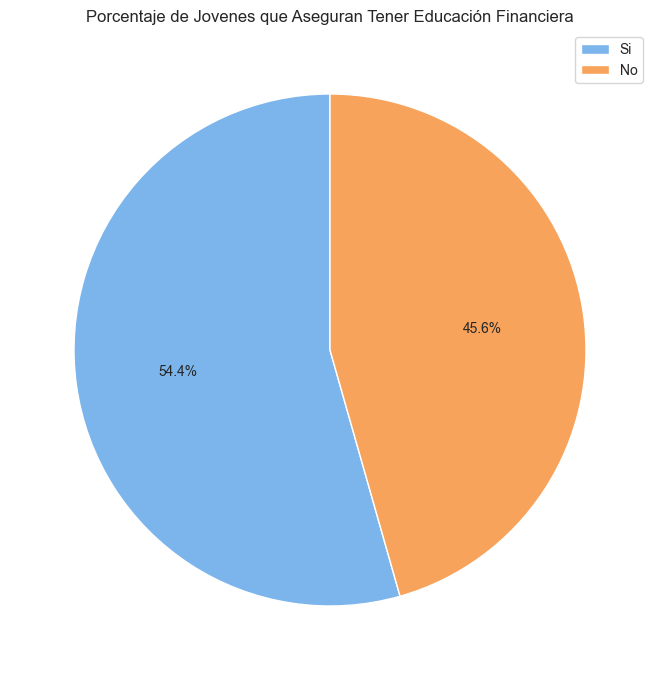

In [ ]:
educacion_financiera = df_con_empleo["educacion_financiera"].value_counts()
Educacion={"Si":1,"No":0}
plt.figure(figsize=(8, 8))
plt.pie(educacion_financiera,colors=["#7cb5ec", "#f7a35c"], autopct="%1.1f%%", startangle=90)
plt.title("Porcentaje de Jovenes que Aseguran Tener Educación Financiera")
plt.legend(labels=list(Educacion.keys()))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

**Nivel de satisfacción general en comparación con el actual**

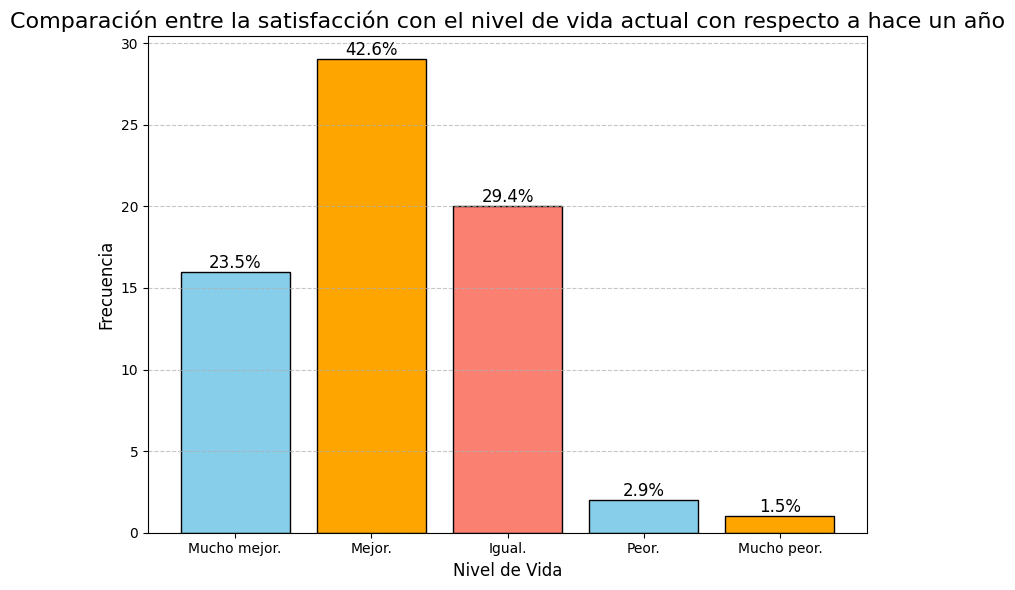

In [ ]:
categories = ['Mucho mejor.', 'Mejor.', 'Igual.', 'Peor.', 'Mucho peor.']
counts = df_con_empleo['nivel_vida'].value_counts().reindex(categories, fill_value=0)
percentages = (counts / counts.sum()) * 100

# Crear el gráfico
plt.figure(figsize=(8, 6))
bars = plt.bar(counts.index, counts.values, color=['skyblue', 'orange', 'salmon'], edgecolor='black')

# Agregar los porcentajes encima de las barras
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)

# Configure the chart
plt.title('Comparación entre la satisfacción con el nivel de vida actual con respecto a hace un año', fontsize=16)
plt.xlabel('Nivel de Vida', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
rangos_salariales = {
    "Menos $40": {"min": 0, "max": 40, "porcentaje": 1.5},
    "$40 a $80": {"min": 40, "max": 80, "porcentaje": 5.9},
    "$80 a $120": {"min": 80, "max": 120, "porcentaje": 17.6},
    "$120 a $160": {"min": 120, "max": 160, "porcentaje": 19.1},
    "$160 a $200": {"min": 160, "max": 200, "porcentaje": 17.6},
    "$200 a $240": {"min": 200, "max": 240, "porcentaje": 13.2},
    "$240 a $280": {"min": 240, "max": 280, "porcentaje": 11.8},
    "$280 a $320": {"min": 280, "max": 320, "porcentaje": 10.3},
    "Más de $320": {"min": 320, "max": 400, "porcentaje": 2.9},  
}

ingresos_promedio = []
pesos = []

for rango, datos in rangos_salariales.items():
    promedio_rango = (datos["min"] + datos["max"]) / 2  
    peso = datos["porcentaje"] / 100  
    ingresos_promedio.append(promedio_rango * peso)
    pesos.append(peso)

ingreso_mensual_promedio = sum(ingresos_promedio)
ingreso_mensual_promedio

180.92000000000002

Niveles de formación después de excluir 'Univesitario.' y 'univesitario':
['Bachiller' 'Posgrado.' 'Profesional' 'Técnico Medio.'
 'Técnico Superior Universitario' 'Universitario.']


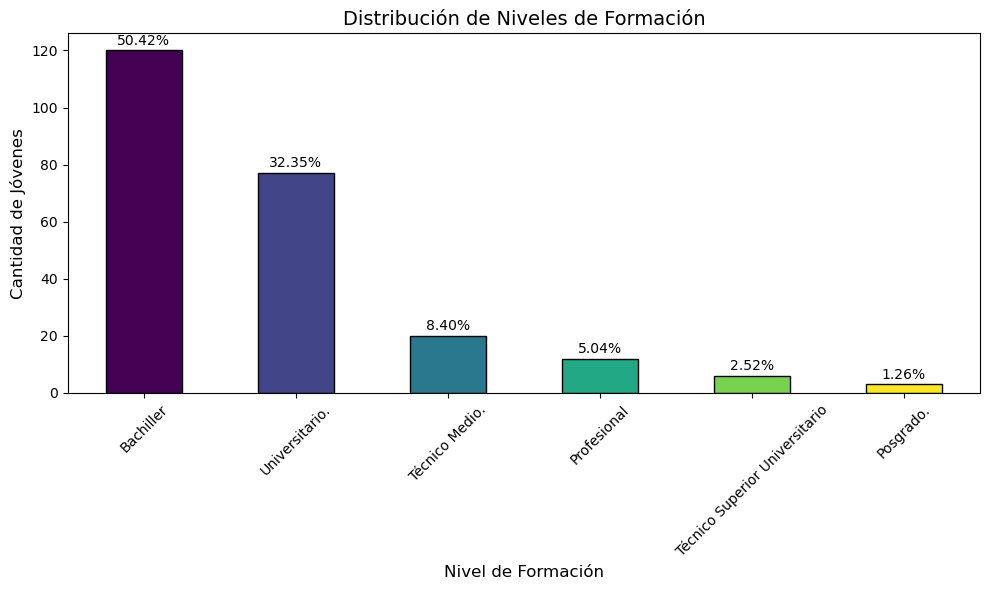

In [ ]:
def eliminar_univesitario(df, column_name):
    """
    Elimina las filas que contienen 'Univesitario.' o 'univesitario' en la columna especificada.
    
    Parameters:
    df (pandas.DataFrame): El DataFrame original.
    column_name (str): El nombre de la columna a verificar.
    
    Returns:
    pandas.DataFrame: El DataFrame sin las filas que contienen 'Univesitario.' o 'univesitario'.
    """
    df_cleaned = df[~df[column_name].isin(['Univesitario.', 'univesitario'])]
    return df_cleaned
    
file_path = 'Encuesta sobre el Poder Adquisitivo de Jóvenes Venezolanos (Respuestas).csv'
data = pd.read_csv(file_path)
data.rename(columns=lambda x: x.strip(), inplace=True)

formation_column = '¿Cuál es su nivel de formación actual?'
data_clean = eliminar_univesitario(data, formation_column)

print("Niveles de formación después de excluir 'Univesitario.' y 'univesitario':")
print(data_clean[formation_column].unique())

formation_distribution = data_clean[formation_column].value_counts()

total = formation_distribution.sum()
formation_percentages = (formation_distribution / total) * 100

colors = plt.cm.viridis(np.linspace(0, 1, len(formation_distribution)))

plt.figure(figsize=(10, 6))
ax = formation_distribution.plot(kind='bar', color=colors, edgecolor='black')

for i, (count, pct) in enumerate(zip(formation_distribution, formation_percentages)):
    ax.text(i, count + 1, f'{pct:.2f}%', ha='center', va='bottom')

plt.title('Distribución de Niveles de Formación', fontsize=14)
plt.xlabel('Nivel de Formación', fontsize=12)
plt.ylabel('Cantidad de Jóvenes', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
data.rename(columns={
    '¿Cuál es su nivel de formación actual? ': 'Formación',
    '¿Cuál es tu ingreso mensual promedio? ': 'Ingreso Mensual'
}, inplace=True)

relevant_data = data[['Formación', 'Ingreso Mensual']].copy()

relevant_data.dropna(subset=['Formación', 'Ingreso Mensual'], inplace=True)

relevant_data['Ingreso Mensual'] = relevant_data['Ingreso Mensual'].str.extract(r'(\d+)').astype(float)

average_income_by_education = relevant_data.groupby('Formación')['Ingreso Mensual'].mean().sort_values(ascending=False)

average_income_by_education

Formación
Profesional                       210.000000
Posgrado.                         146.666667
Bachiller                         139.333333
Universitario.                    135.757576
Técnico Medio.                    132.307692
Técnico Superior Universitario     93.333333
Name: Ingreso Mensual, dtype: float64

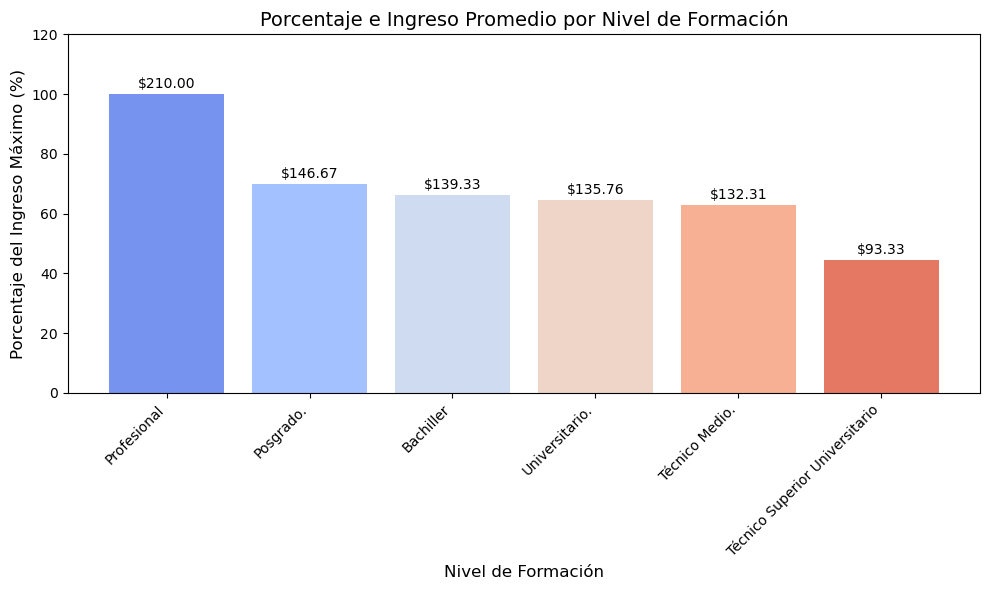

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

max_income = average_income_by_education.max()
percentage = (average_income_by_education / max_income) * 100

palette = sns.color_palette("coolwarm", len(average_income_by_education))

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(average_income_by_education.index, percentage, color=palette, alpha=0.9)

for bar, income in zip(bars, average_income_by_education):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
            f"${income:.2f}", ha='center', fontsize=10, color='black')

ax.set_title("Porcentaje e Ingreso Promedio por Nivel de Formación", fontsize=14)
ax.set_ylabel("Porcentaje del Ingreso Máximo (%)", fontsize=12)
ax.set_xlabel("Nivel de Formación", fontsize=12)
ax.set_ylim(0, 120)  # Espacio para etiquetas por encima de 100%
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Valores únicos en la columna de ocupación: ['Estudiante y empleado.' 'Empleado o emprendedor' 'Estudiante.'
 'Desempleado.' 'Estudiante y empleado | Estudiante y emprendedor']
Conteos de las categorías filtradas: ¿cuál es su ocupación principal?
Estudiante.                                         113
Estudiante y empleado | Estudiante y emprendedor     48
Empleado o emprendedor                               44
Desempleado.                                          3
Name: count, dtype: int64


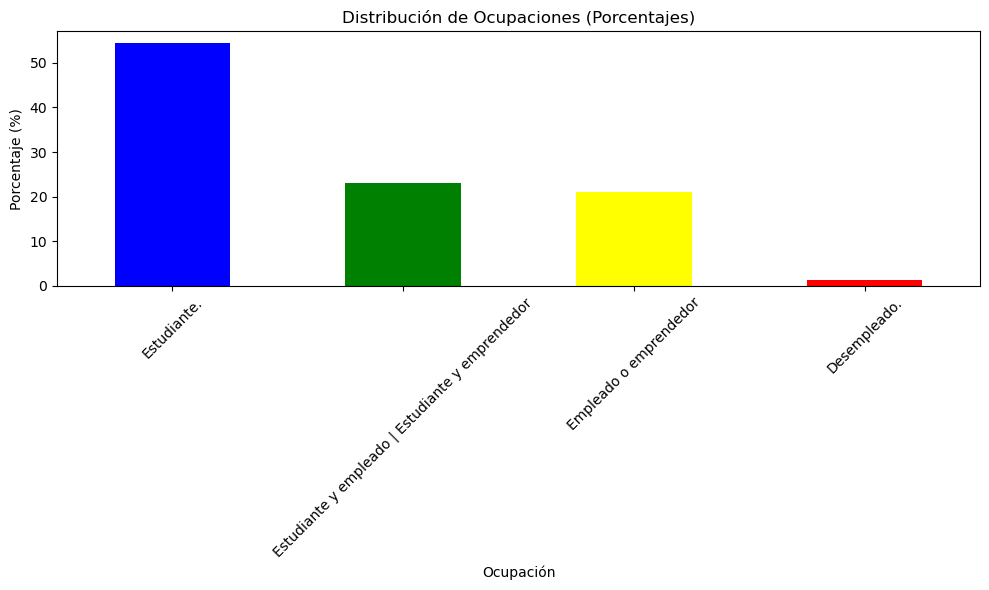

In [ ]:
data.columns = [col.strip().lower() for col in data.columns]

occupation_column = '¿cuál es su ocupación principal?'

print("Valores únicos en la columna de ocupación:", data[occupation_column].unique())

occupation_counts = data[occupation_column].value_counts()

categories_to_plot = ['Estudiante y empleado | Estudiante y emprendedor', 
                      'Empleado o emprendedor', 'Desempleado.', 'Estudiante.']
filtered_counts = occupation_counts[occupation_counts.index.isin(categories_to_plot)]

print("Conteos de las categorías filtradas:", filtered_counts)

filtered_percentages = (filtered_counts / filtered_counts.sum()) * 100

plt.figure(figsize=(10, 6))
filtered_percentages.plot(kind='bar', color=['blue', 'green', 'yellow', 'red'])
plt.title('Distribución de Ocupaciones (Porcentajes)')
plt.xlabel('Ocupación')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.tight_layout()